In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("gender_classification_v7[1].xls")

In [4]:
df

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female
...,...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0,Female
4997,1,11.9,5.4,0,0,0,0,Female
4998,1,12.9,5.7,0,0,0,0,Female
4999,1,13.2,6.2,0,0,0,0,Female


In [5]:
df.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


In [6]:
df.shape

(5001, 8)

In [7]:
df.value_counts()

long_hair  forehead_width_cm  forehead_height_cm  nose_wide  nose_long  lips_thin  distance_nose_to_lip_long  gender
1          14.2               6.5                 0          0          0          0                          Female    9
           13.7               6.1                 0          0          0          0                          Female    8
           12.5               5.7                 0          0          0          0                          Female    7
           12.7               5.9                 1          1          1          1                          Male      7
           14.1               6.0                 0          0          0          0                          Female    7
                                                                                                                       ..
           12.9               5.1                 0          1          0          0                          Female    1
0          15.3              

## handling the null values

In [8]:
df.isnull().sum()

long_hair                    0
forehead_width_cm            0
forehead_height_cm           0
nose_wide                    0
nose_long                    0
lips_thin                    0
distance_nose_to_lip_long    0
gender                       0
dtype: int64

In [9]:
df.isnull()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
4996,False,False,False,False,False,False,False,False
4997,False,False,False,False,False,False,False,False
4998,False,False,False,False,False,False,False,False
4999,False,False,False,False,False,False,False,False


## Handling the outliers

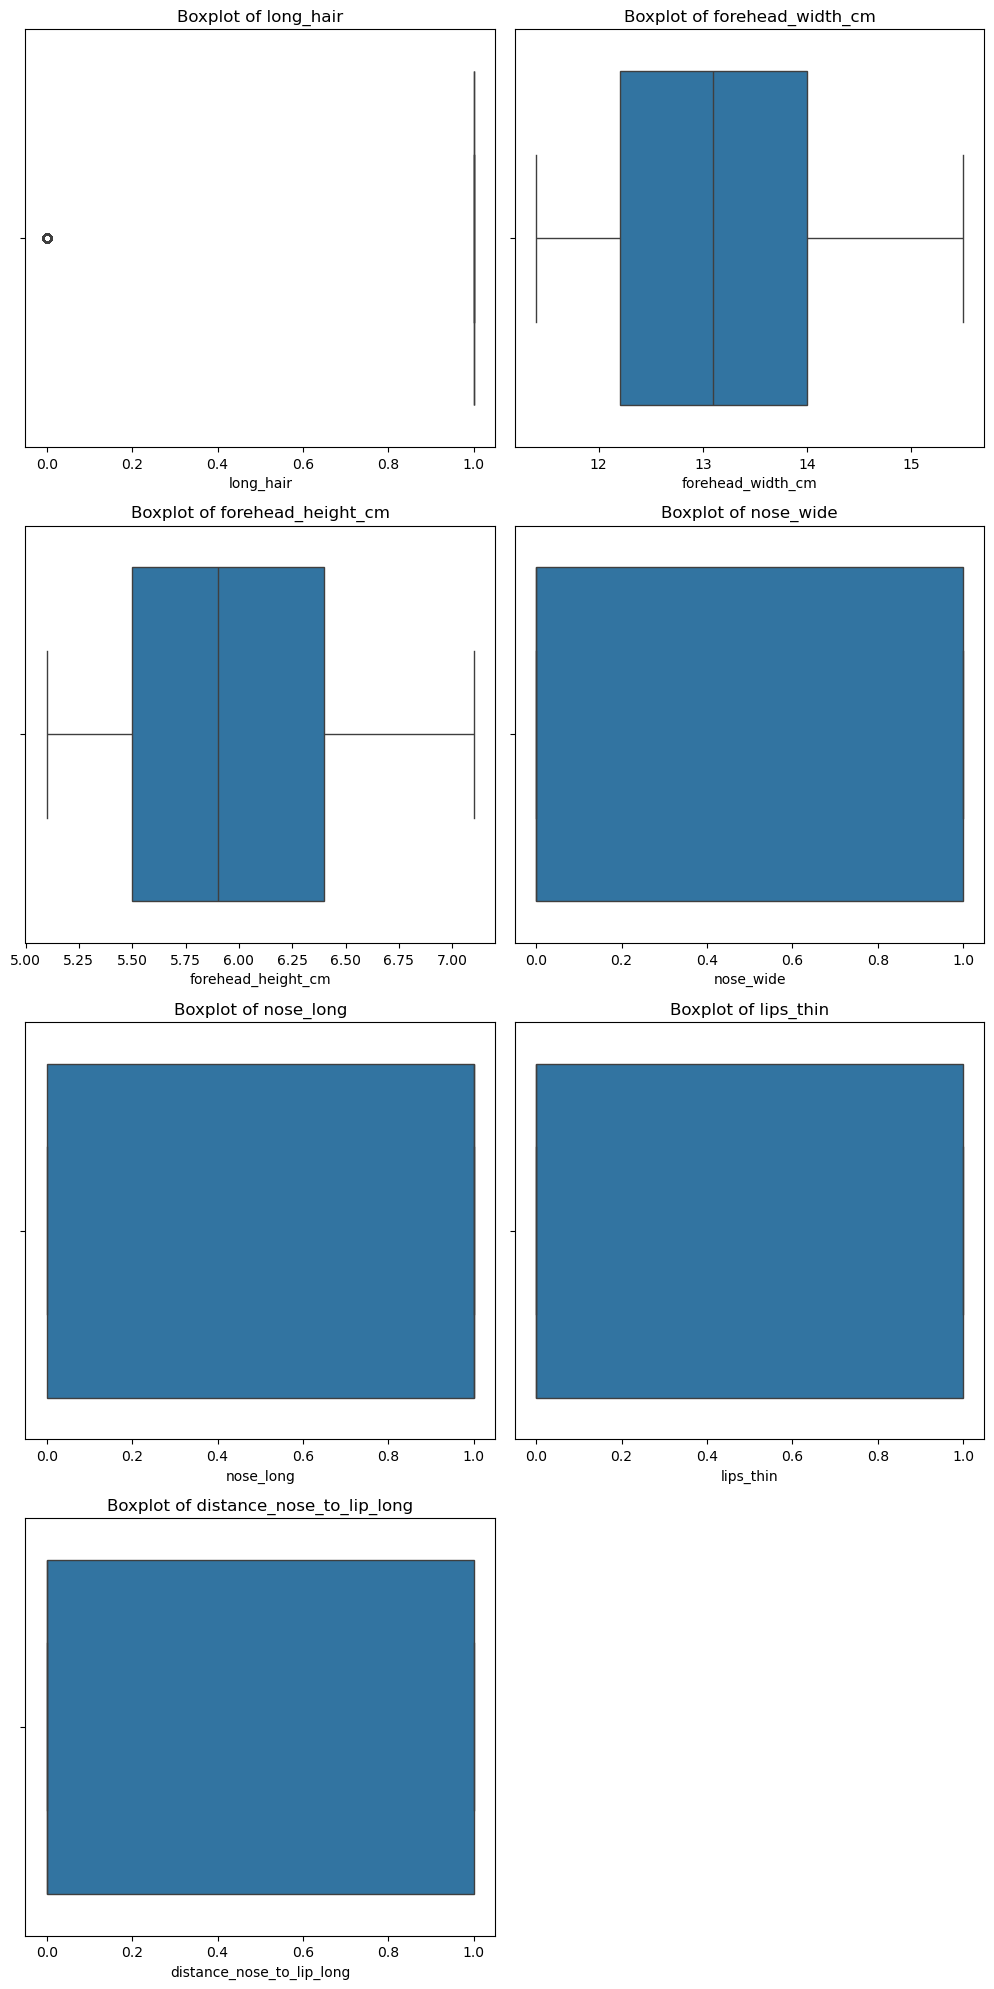

In [10]:
#sns.boxplot(x="forehead_width_cm",data=df)

columns_to_plot = ['long_hair','forehead_width_cm','forehead_height_cm','nose_wide','nose_long','lips_thin','distance_nose_to_lip_long']
n = len(columns_to_plot)

# Set 2 columns per row
ncols = 2
nrows = (n + 1) // ncols

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, 5 * nrows))
axes = axes.flatten()

# Plot boxplots vertically (straight orientation)
for i, col in enumerate(columns_to_plot):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')

# Hide unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## Feature selection

In [11]:
#df.corr() 
corr1=df[["long_hair","forehead_width_cm","forehead_height_cm","nose_wide","nose_long","lips_thin","distance_nose_to_lip_long"]].corr()
corr1

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
long_hair,1.000000,-0.006530,-0.017233,0.001216,0.014432,0.011287,-0.025794
forehead_width_cm,-0.006530,1.000000,0.088596,0.251648,0.257368,0.258564,0.251328
forehead_height_cm,-0.017233,0.088596,1.000000,0.211655,0.194120,0.205441,0.215292
nose_wide,0.001216,0.251648,0.211655,1.000000,0.565192,0.557615,0.569303
nose_long,0.014432,0.257368,0.194120,0.565192,1.000000,0.561229,0.559794
lips_thin,0.011287,0.258564,0.205441,0.557615,0.561229,1.000000,0.565312
distance_nose_to_lip_long,-0.025794,0.251328,0.215292,0.569303,0.559794,0.565312,1.000000


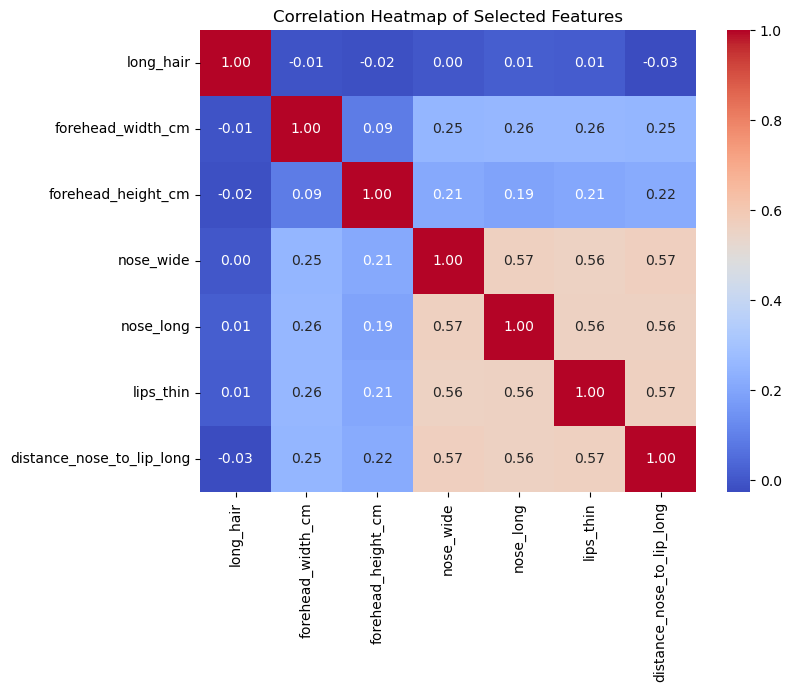

In [12]:
# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr1, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Selected Features")
plt.show()

## Hypothesis testing

In [13]:
df["gender"].unique()

array(['Male', 'Female'], dtype=object)

## Encoding

In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["gender"] = le.fit_transform(df["gender"])
print(le.classes_)

['Female' 'Male']


In [15]:
df

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,1
1,0,14.0,5.4,0,0,1,0,0
2,0,11.8,6.3,1,1,1,1,1
3,0,14.4,6.1,0,1,1,1,1
4,1,13.5,5.9,0,0,0,0,0
...,...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0,0
4997,1,11.9,5.4,0,0,0,0,0
4998,1,12.9,5.7,0,0,0,0,0
4999,1,13.2,6.2,0,0,0,0,0


## split,train and test

In [16]:
x=df.iloc[:,:-1] #all columns except the last (target)
y=df.iloc[:,-1] # the last column (target)

In [17]:
x

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
0,1,11.8,6.1,1,0,1,1
1,0,14.0,5.4,0,0,1,0
2,0,11.8,6.3,1,1,1,1
3,0,14.4,6.1,0,1,1,1
4,1,13.5,5.9,0,0,0,0
...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0
4997,1,11.9,5.4,0,0,0,0
4998,1,12.9,5.7,0,0,0,0
4999,1,13.2,6.2,0,0,0,0


In [18]:
y

0       1
1       0
2       1
3       1
4       0
       ..
4996    0
4997    0
4998    0
4999    0
5000    1
Name: gender, Length: 5001, dtype: int32

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [20]:
x_train

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
4677,1,15.4,6.6,0,1,1,1
800,1,12.2,5.2,0,0,0,0
3671,0,11.5,5.8,0,0,0,0
4193,1,12.7,5.1,0,0,0,0
2968,1,15.1,5.6,1,1,1,1
...,...,...,...,...,...,...,...
4426,1,13.0,6.5,0,0,0,0
466,1,13.1,5.5,0,0,0,0
3092,1,12.0,5.9,0,0,0,0
3772,1,12.8,5.4,0,0,0,0


In [21]:
y_train

4677    1
800     0
3671    0
4193    0
2968    1
       ..
4426    0
466     0
3092    0
3772    0
860     0
Name: gender, Length: 4000, dtype: int32

## Balancing the imbalance data

In [22]:
y_train.value_counts()

gender
1    2001
0    1999
Name: count, dtype: int64

In [23]:
# Initialize SMOTE with a random state for reproducibility
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)

# Fit and transform the training data
x_train_balanced, y_train_balanced = smote.fit_resample(x_train, y_train)

# Check the new class distribution
print(pd.Series(y_train_balanced).value_counts())

gender
1    2001
0    2001
Name: count, dtype: int64


## Scaling

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [25]:
#scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

x_train_scaled=scaler.fit_transform(x_train)
x_train_scaled

x_test_scaled=scaler.transform(x_test)

## Logistic regression

In [26]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model

LogisticRegression()

In [27]:
model.fit(x_train_scaled,y_train)

LogisticRegression()

In [28]:
y_pred=model.predict(x_test_scaled)

In [29]:
#training accuracy
from sklearn.metrics import accuracy_score
print ("Accuracy is "), accuracy_score(y_test,y_pred)*100

Accuracy is 


(None, 96.1038961038961)

In [30]:
#testing accuracy
y2_pred=model.predict(x_train_scaled)
print ("Accuracy is "), accuracy_score(y_train,y2_pred)*100

Accuracy is 


(None, 97.0)

In [31]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       502
           1       0.50      1.00      0.67       499

    accuracy                           0.50      1001
   macro avg       0.25      0.50      0.33      1001
weighted avg       0.25      0.50      0.33      1001



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples

## SVM

In [32]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [33]:
from sklearn.svm import SVC  # support vector classification 
model=SVC(kernel="rbf",C=1,gamma='scale') 
model

SVC(C=1)

In [34]:
final=model.fit(x_train,y_train)
final

SVC(C=1)

In [35]:
# training accuracy
y_pred=model.predict(x_test)
print("Accuracy is"),accuracy_score(y_test,y_pred)*100
                                            

Accuracy is


(None, 96.30369630369631)

In [36]:
# testing accuracy
x_pred_train=model.predict(x_train)
print ("Accuracy is"),accuracy_score(x_pred_train,y_train)*100

Accuracy is


(None, 97.0)

In [37]:
from sklearn.metrics import confusion_matrix, classification_report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       502
           1       0.97      0.96      0.96       499

    accuracy                           0.96      1001
   macro avg       0.96      0.96      0.96      1001
weighted avg       0.96      0.96      0.96      1001



## KNN

In [38]:
#To find K
import math
math.sqrt(len(y_test))

31.63858403911275

In [39]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=7,metric="euclidean")

In [40]:
model.fit(x_train_scaled,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=7)

In [41]:
y_pred=model.predict(x_test_scaled)
print(accuracy_score(y_test,y_pred)*100)

96.30369630369631


In [42]:
y2_pred=model.predict(x_train_scaled)
print(accuracy_score(y_train,y2_pred)*100)

97.625


In [43]:
from sklearn.metrics import confusion_matrix, classification_report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       502
           1       0.98      0.95      0.96       499

    accuracy                           0.96      1001
   macro avg       0.96      0.96      0.96      1001
weighted avg       0.96      0.96      0.96      1001



## decision tree

In [44]:
from sklearn.tree import DecisionTreeClassifier
clf_entropy= DecisionTreeClassifier(criterion="entropy",max_depth=5,min_samples_leaf= 4, min_samples_split = 6)
clf_entropy.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=4,
                       min_samples_split=6)

In [45]:
clf_gini = DecisionTreeClassifier(criterion="gini",max_depth=2)
clf_gini.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=2)

In [46]:
from sklearn.metrics import accuracy_score
y_pred=clf_entropy.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.957042957042957


In [47]:
y2_pred=clf_entropy.predict(x_train)
print(accuracy_score(y_train,y2_pred))

0.972


In [48]:
#hyperparameter tunning(beore testing we can find accuracy which is the best)-cross validation(CV)
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define parameter distributions for Randomized Search
param_dist = {
    'criterion': ['gini', 'entropy'],  # Or 'log_loss' if supported
    'max_depth': [None, 5, 10, 20, 30],
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 5)
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_distributions=param_dist,
    n_iter=10,  # You can increase this for more exploration
    cv=5,
    random_state=42
)

# Fit on training data
random_search.fit(x_train, y_train)

# Print the best parameters found
print("Best parameters:", random_search.best_params_)

Best parameters: {'criterion': 'gini', 'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 9}


In [49]:
from sklearn.metrics import confusion_matrix, classification_report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       502
           1       0.97      0.94      0.96       499

    accuracy                           0.96      1001
   macro avg       0.96      0.96      0.96      1001
weighted avg       0.96      0.96      0.96      1001



## Random forest

In [50]:
#import the model
from sklearn.ensemble import RandomForestClassifier

In [51]:
model = RandomForestClassifier(n_estimators=300, max_features='sqrt', max_depth=20, random_state=42, min_samples_split = 5, min_samples_leaf = 1, criterion = 'gini')
model.fit(x_train, y_train)

RandomForestClassifier(max_depth=20, min_samples_split=5, n_estimators=300,
                       random_state=42)

In [52]:
accuracy = model.score(x_test, y_test)*100
print("Model Accurcy:",accuracy)

Model Accurcy: 96.40359640359641


In [53]:
accuracy1 = model.score(x_train, y_train)*100
print("Model Accurcy:",accuracy1)

Model Accurcy: 99.2


In [54]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint


param_dist = {'n_estimators': [100, 200, 300],            # Number of trees
    'max_depth': [None, 10, 20, 30],            # Max depth of each tree
    'min_samples_split': [2, 5, 10],            # Min samples to split an internal node
    'min_samples_leaf': [1, 2, 4],              # Min samples required at leaf node
    'max_features': ['auto', 'sqrt', 'log2'],   # Number of features to consider at each split
    'criterion': ['gini', 'entropy']            # Function to measure quality of a split
            }
    
rf = RandomForestClassifier()

rand_search = RandomizedSearchCV(rf, param_distributions = param_dist,n_iter=5, cv=5,verbose=1, n_jobs=-1)

rand_search.fit(x_train, y_train)
print("Best Hyperparameters:")
print(rand_search.best_params_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
10 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
8 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\ProgramData\anaconda3\Lib\site-packages\s

Best Hyperparameters:
{'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': None, 'criterion': 'gini'}


In [55]:
from sklearn.metrics import confusion_matrix, classification_report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       502
           1       0.97      0.94      0.96       499

    accuracy                           0.96      1001
   macro avg       0.96      0.96      0.96      1001
weighted avg       0.96      0.96      0.96      1001

